In [30]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import PIL 
import os
import cv2
import pathlib
from pathlib import Path
from PIL import Image
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the train folder's path
data_dir=Path('/Users/sahilagarwal/Desktop/Assignment/DEEP_LEARNING/Traffic_Sign_Classification/Data/Train')
data_dir

PosixPath('/Users/sahilagarwal/Desktop/Assignment/DEEP_LEARNING/Traffic_Sign_Classification/Data/Train')

In [3]:
# Load and preprocess images from each class folder of train directory
data_list = []
labels_list = []
classes_count=43

for i in range(classes_count):
    i_path=os.path.join(data_dir,str(i))
    for image in os.listdir(i_path):
        img=Image.open(i_path + '/' + image)
        img=img.resize((32,32))     # Resizing image
        img = np.array(img)
        img=img/255                 # Normalize image(Getting the values between 0 and 1)
        data_list.append(img)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
  

In [4]:
#Define the classes
class_names = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

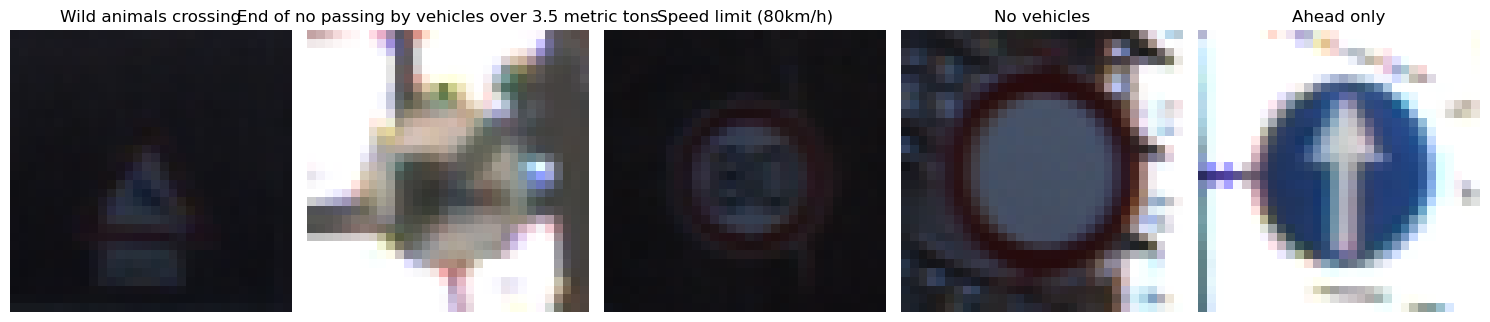

In [5]:
#Print images along with their respective classes
random_indices = np.random.choice(len(data), 5, replace=False)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[idx])
    plt.title(class_names[labels[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
#Divide the Train dataset into train and validation
X=data
y=labels

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=25
)


In [7]:
#Load and preprocess images from each test folder
test_df=pd.read_csv('Data/test.csv')
test_df['image_path'] = test_df['Path'].apply(lambda x: os.path.join('Data', x))
X_test=[]
y_test=[]
for _, row in test_df.iterrows():
    img_path=row['image_path']
    label=row['ClassId']
    
    img2=cv2.imread(img_path)
    if img2 is None:
        continue
        
    img2 = Image.open(img_path).resize((32, 32))     # Resize image
    img2_array = np.array(img2) / 255.0              # Normalize image(Getting the values between 0 and 1)
    
    X_test.append(img2_array)
    y_test.append(label)
#Converting into numpy array
X_test=np.array(X_test)
y_test=np.array(y_test)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
#Build the CNN Model
model=Sequential([
  layers.Conv2D(64, 3, padding='same', activation='relu',input_shape=X.shape[1:]),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(43, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,275,627 (16.31 MB)

 Trainable params: 4,275,627 (16.31 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Train the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 66s 134ms/step - accuracy: 0.5167 - loss: 1.8224 - val_accuracy: 0.9643 - val_loss: 0.1640
Epoch 2/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 68s 138ms/step - accuracy: 0.9438 - loss: 0.1964 - val_accuracy: 0.9806 - val_loss: 0.0897
Epoch 3/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 71s 145ms/step - accuracy: 0.9757 - loss: 0.0891 - val_accuracy: 0.9841 - val_loss: 0.0752
Epoch 4/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.9808 - loss: 0.0641 - val_accuracy: 0.9871 - val_loss: 0.0637
Epoch 5/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 84s 171ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9904 - val_loss: 0.0480
Epoch 6/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 89s 181ms/step - accuracy: 0.9901 - loss: 0.0340 - val_accuracy: 0.9904 - val_loss: 0.0513
Epoch 7/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 85s 173ms/step - accuracy: 0.9914 - loss: 0.0294 - val_accuracy: 0.9915 - val_loss: 0.0528
Epoch 8/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 89s 180ms/step - accuracy: 0.9905 - loss: 0

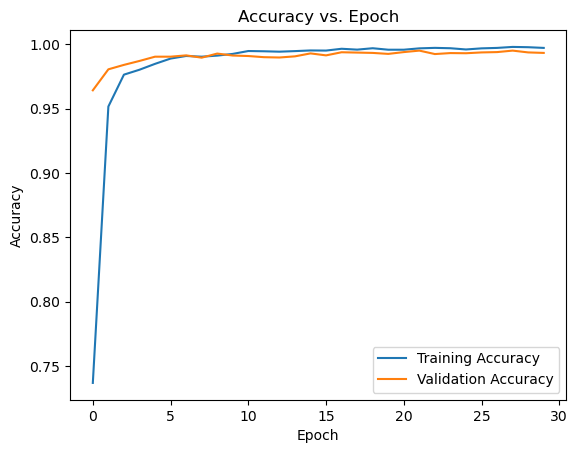

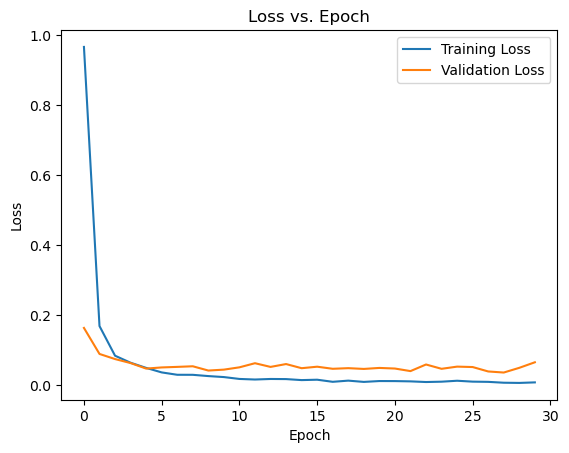

In [11]:
# Plot the accuracy across epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

# Plot the loss across epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

In [12]:
#Test the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9633 - loss: 0.2437
Test Loss: 0.2501623332500458
Test Accuracy: 0.9618368744850159


395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step


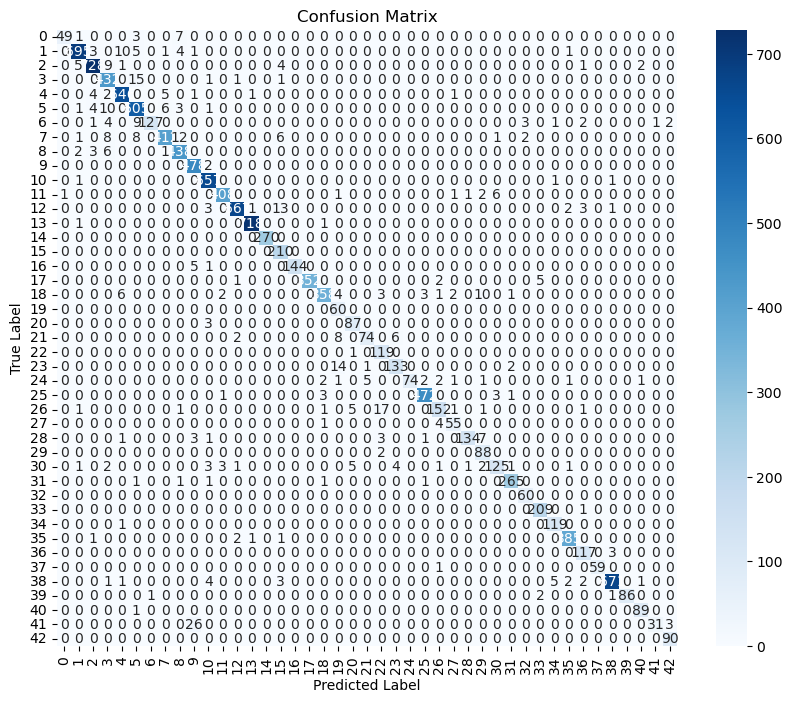

In [26]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(cm.shape[0]),
            yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [34]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        60
           1       0.98      0.97      0.97       720
           2       0.98      0.97      0.97       750
           3       0.91      0.96      0.94       450
           4       0.97      0.98      0.97       660
           5       0.94      0.96      0.95       630
           6       0.99      0.85      0.91       150
           7       0.97      0.92      0.94       450
           8       0.94      0.97      0.96       450
           9       0.93      1.00      0.96       480
          10       0.97      1.00      0.98       660
          11       0.99      0.97      0.98       420
          12       0.99      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.88      1.00      0.94       210
          16       1.00      0.96      0.98       150
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


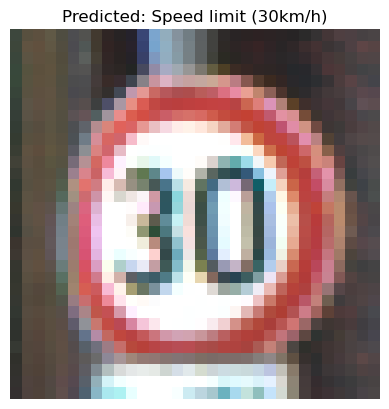

Predicted Class ID: 1
Predicted Class Name: Speed limit (30km/h)


In [46]:
file_path=Path('/Users/sahilagarwal/Desktop/Assignment/DEEP_LEARNING/3.png')

from PIL import Image
import numpy as np

# Load and preprocess the image
img = Image.open(file_path)
img = img.resize((32, 32))  # Same size as training data
img = np.array(img)

# Handle grayscale or alpha channel issues
if img.shape[-1] == 4:  # RGBA
    img = img[..., :3]
elif len(img.shape) == 2:  # grayscale
    img = np.stack((img,) * 3, axis=-1)

img = img / 255.0  # Normalize like training data
img = np.expand_dims(img, axis=0)  # Add batch dimension: (1, 32, 32, 3)

pred = model.predict(img)
predicted_class = np.argmax(pred)

plt.imshow(img.squeeze())
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

print(f"Predicted Class ID: {predicted_class}")
print(f"Predicted Class Name: {class_names[predicted_class]}")